# Import libraries and data


In [2]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python'
C:\Users\Windows10\Desktop\forecast\Forecasting Models and Time Series for Business in Python\2. Seasonal Decomposition


In [9]:
#import libraries
import pandas as pd
import numpy as np

In [10]:
#get the data
data = pd.read_csv("Daily Bike Sharing.csv", 
                   index_col = "dteday", 
                   parse_dates = True)
data.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [11]:
#select variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)                       

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


#Data Transformation

In [12]:
#renaming variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [13]:
#index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

#Visualization

<Axes: xlabel='dteday'>

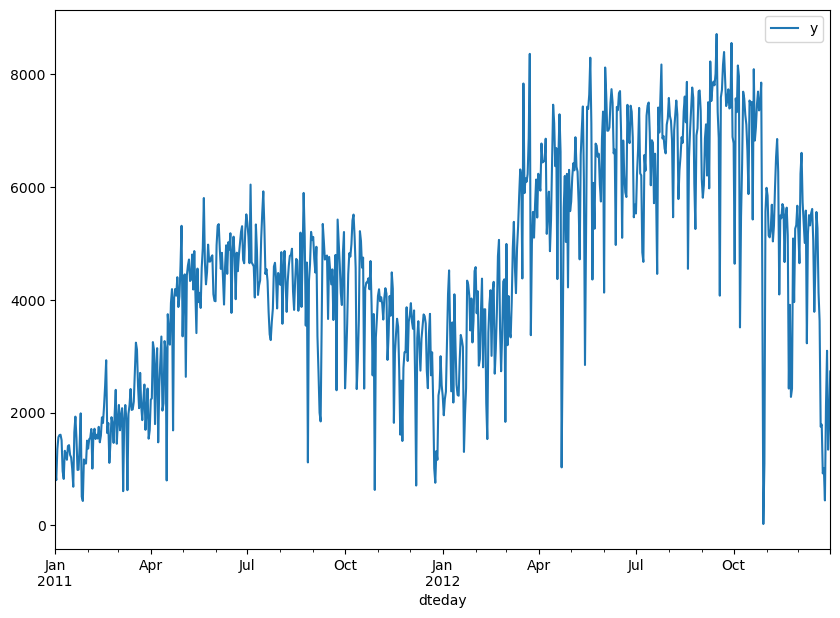

In [14]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

#Seasonal Decomposition

In [15]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['y'], 
                                   model = 'multiplicative', 
                                   freq = 365)
decomposition.plot();

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [ ]:
#seasonality graphs
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(dataset['y'].resample(rule = 'MS').mean())
quarter_plot(dataset['y'].resample(rule = 'Q').mean());